## 1. Introduction to SVM

Business case: Company is attempting to determine whether a customer is more likely or less likely to leave the company based on a set of data collected. The goal is to build a useful consumer profile to increase brand loyalty.

SVM will be used to map the data to a high-dimensional feature space so that data points can be categorized, even when the data points are not linearly separable. A separator between the categories will be determined, and then the data will be transformed so that the separator could be drawn as a hyperplane.

## 2. Necessary Imports

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 3. Load Data From CSV File

In [3]:
#Reading file and importing data into Python
#This data has 10 predictors (columns) and 3333 records (rows)
#Column = attribute / dimension
#Target = Prediction
df_chu = pd.read_csv('telecom_churn.csv')
df_chu

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [4]:
#Exploring the data
df_chu.tail()
df_chu.shape
df_chu.size
df_chu.count()
df_chu['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

## 4. Distribution of the classes

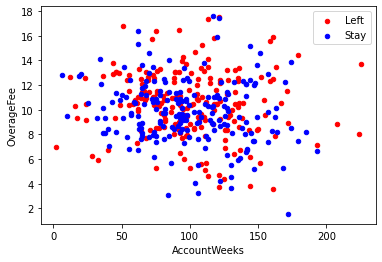

In [5]:
left_df = df_chu[df_chu['Churn']==1][0:200]
stay_df = df_chu[df_chu['Churn']==0][0:200]

axes = left_df.plot(kind='scatter', x='AccountWeeks', y='OverageFee', color='red', label='Left')
stay_df.plot(kind='scatter', x='AccountWeeks', y='OverageFee', color='blue', label='Stay', ax=axes)

## 5. Identifying unwated rows

In [6]:
df_chu.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [7]:
corrMatrix=df_chu.corr()
print (corrMatrix)

                    Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
Churn            1.000000      0.016541        -0.259852 -0.102148  -0.087195   
AccountWeeks     0.016541      1.000000        -0.024735  0.002918   0.014391   
ContractRenewal -0.259852     -0.024735         1.000000 -0.006006  -0.019223   
DataPlan        -0.102148      0.002918        -0.006006  1.000000   0.945982   
DataUsage       -0.087195      0.014391        -0.019223  0.945982   1.000000   
CustServCalls    0.208750     -0.003796         0.024522 -0.017824  -0.021723   
DayMins          0.205151      0.006216        -0.049396 -0.001684   0.003176   
DayCalls         0.018459      0.038470        -0.003755 -0.011086  -0.007962   
MonthlyCharge    0.072313      0.012581        -0.047291  0.737490   0.781660   
OverageFee       0.092812     -0.006749        -0.019105  0.021526   0.019637   
RoamMins         0.068239      0.009514        -0.045871 -0.001318   0.162746   

                 CustServCa

## 6. Examining the Correlation of the dataset

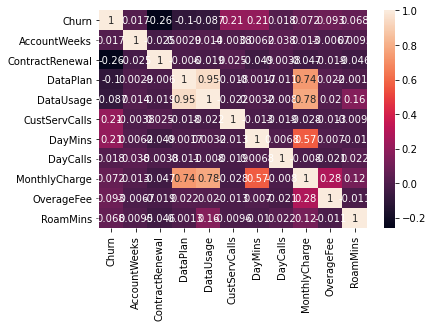

In [8]:
import seaborn as sn

sn.heatmap(corrMatrix, annot=True)
plt.show()

## 7. Remove unwated column

In [9]:
df_chu.columns

feature_df = df_chu[['CustServCalls', 'DayMins', 'MonthlyCharge', 'OverageFee',
       'RoamMins']]

#Independent variable
X = np.asarray(feature_df)

#Dependent variable
y = np.asarray(df_chu['Churn'])

X[0:5]

array([[  1.  , 265.1 ,  89.  ,   9.87,  10.  ],
       [  1.  , 161.6 ,  82.  ,   9.78,  13.7 ],
       [  0.  , 243.4 ,  52.  ,   6.06,  12.2 ],
       [  2.  , 299.4 ,  57.  ,   3.1 ,   6.6 ],
       [  3.  , 166.7 ,  41.  ,   7.42,  10.1 ]])

## 8. Divide the data as Train/Test dataset

In [10]:
'''
def_chu (100)--> Train/Test (80 rows) / Test(20 rows)

Train(X,y) ## X itself is a 2D array. ## y is 1D
Test(X,y)
'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

#1666 x 10
X_train.shape

#1666 x 1
y_train.shape

#1677 x 10
X_test.shape

#1677 x 1
y_test.shape

(1667,)

## 9. Modeling (SVM with Scikit-learn)

In [37]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma=0.001, C=100)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)


In [35]:
from sklearn.model_selection import GridSearchCV
#Grid Search
#Paramenter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

#Make grid searh classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose =1)

#Train the Classifier
clf_grid.fit(X_train, y_train)

#clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
 {'C': 100, 'gamma': 0.001}
Best Estimators:
 SVC(C=100, gamma=0.001)


## 10. Evaluation (Results)

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[1414,   13],
       [ 228,   12]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1427
           1       0.48      0.05      0.09       240

    accuracy                           0.86      1667
   macro avg       0.67      0.52      0.51      1667
weighted avg       0.81      0.86      0.80      1667



## 11. Conclusion

The model correctly predicted the positive class as 12 customers who contributed to churn were predicted positively by the model. The model correctly predicted the negative class, as 1414 of customers who did not contribute to churn were predicted negatively. The model provided the wrong prediction of the negative class. 228 of customers were predicted to contribute to churn, did not contribute to churn and the model wrongly predicted the positive class. 13 customers who contributed to churn were predicted as negative. The model is better at identifying customers who will not contribute to churn as opposed to contributing to churn. Accuracy is not used, as this is a highly unbalanced data set, as noted by the support column for each class.